# 신경망 모델
- 이진 분류: 유방암 예측 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 준비

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.shape

(569, 31)

## 1. 데이터를 정규/표준화 하지 않은 경우

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target,
    test_size=0.2, random_state=2022
)

- 모델 정의

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense       # Fully Connected Network

In [6]:
model = Sequential([
    Dense(100, input_shape=(30,), activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')                    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정(컴파일)

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- 모델 학습

In [8]:
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 2s 123ms/step - loss: 60.3865 - accuracy: 0.6209 - val_loss: 32.0121 - val_accuracy: 0.6484
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 26.7162 - accuracy: 0.4698 - val_loss: 12.5426 - val_accuracy: 0.2198
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 14.4466 - accuracy: 0.3159 - val_loss: 18.6975 - val_accuracy: 0.3407
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 16.6214 - accuracy: 0.3626 - val_loss: 13.2105 - val_accuracy: 0.3407
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 9.8156 - accuracy: 0.2747 - val_loss: 6.6505 - val_accuracy: 0.1868
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 8.0582 - accuracy: 0.3874 - val_loss: 4.9795 - val_accuracy: 0.3626
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 4.4306 - accuracy: 0.2473 - val_loss: 5.1551 - val_accuracy: 0.3516
Epoch 8/100

- 모델 평가

In [9]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.2344 - accuracy: 0.9035


[0.23439329862594604, 0.9035087823867798]

- 훈련과정 시각화: epoch에 따른 accuracy, val_loss의 변화

In [10]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

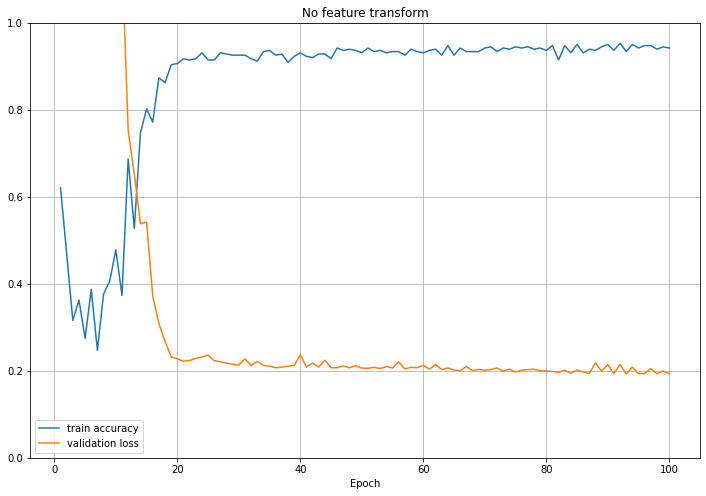

In [11]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

## 2. 데이터를 정규/표준화한 경우

In [12]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [13]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target,
    test_size=0.2, random_state=2022
)

- 모델 정의

In [14]:
model2 = Sequential()
model2.add(Dense(100, input_dim=30, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정

In [15]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- 모델 학습

In [16]:
hist2 = model2.fit(X_train2, y_train2, validation_split=0.2,
                   epochs=100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 1s 93ms/step - loss: 0.6920 - accuracy: 0.5687 - val_loss: 0.5863 - val_accuracy: 0.7363
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.5443 - accuracy: 0.7995 - val_loss: 0.4707 - val_accuracy: 0.8901
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.4342 - accuracy: 0.8984 - val_loss: 0.3868 - val_accuracy: 0.9011
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.3559 - accuracy: 0.9176 - val_loss: 0.3260 - val_accuracy: 0.9121
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2950 - accuracy: 0.9258 - val_loss: 0.2811 - val_accuracy: 0.9121
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.2513 - accuracy: 0.9286 - val_loss: 0.2469 - val_accuracy: 0.9231
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.2172 - accuracy: 0.9313 - val_loss: 0.2211 - val_accuracy: 0.9231
Epoch 8/100
4/4 [===

- 모델 평가

In [17]:
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 4ms/step - loss: 0.0793 - accuracy: 0.9825


[0.07928454875946045, 0.9824561476707458]

- 학습과정 시각화

In [18]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs = np.arange(1, len(y_acc2)+1)

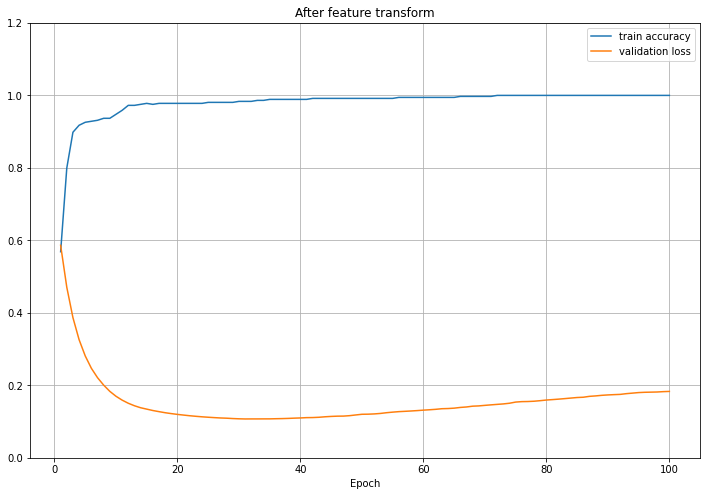

In [19]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs, y_vloss2, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('After feature transform')
plt.show()